In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
bibles = {
    "asv": "../model_annotation/asv_out.csv",
    "fbv": "../model_annotation/fbv_out.csv",
    "kjv": "../model_annotation/kjv_out.csv",
    "web": "../model_annotation/web_out.csv",
    "wmb": "../model_annotation/wmb_out.csv",
}

bible_sentiments = {
    "asv": {"positive": 0, "negative": 0, "neutral": 0},
    "fbv": {"positive": 0, "negative": 0, "neutral": 0},
    "kjv": {"positive": 0, "negative": 0, "neutral": 0},
    "web": {"positive": 0, "negative": 0, "neutral": 0},
    "wmb": {"positive": 0, "negative": 0, "neutral": 0},
}

total_sentiment = {
    "asv": 0,
    "fbv": 0,
    "kjv": 0,
    "web": 0,
    "wmb": 0,
}

In [7]:
for bible in bibles:
    bible_df = pd.read_csv(bibles[bible])
    # Get the total count of each sentiment
    sentiment_counts = bible_df["sentiment"].value_counts()
    print(sentiment_counts)

    # percent distribution of each sentiment
    bible_sentiments[bible]["positive"] = sentiment_counts[2] / sentiment_counts.sum()
    bible_sentiments[bible]["negative"] = sentiment_counts[3] / sentiment_counts.sum()
    bible_sentiments[bible]["neutral"] = sentiment_counts[1] / sentiment_counts.sum()

    total_sentiment[bible] = (sentiment_counts[2]) / (sentiment_counts[2] + sentiment_counts[3])

sentiment
1    7400
2    1745
3    1257
Name: count, dtype: int64
sentiment
1    5297
3    2843
2    2223
Name: count, dtype: int64
sentiment
1    7057
2    1903
3    1408
Name: count, dtype: int64
sentiment
1    7711
3    2415
2    2371
0       3
Name: count, dtype: int64
sentiment
1    6570
2    1960
3    1836
Name: count, dtype: int64


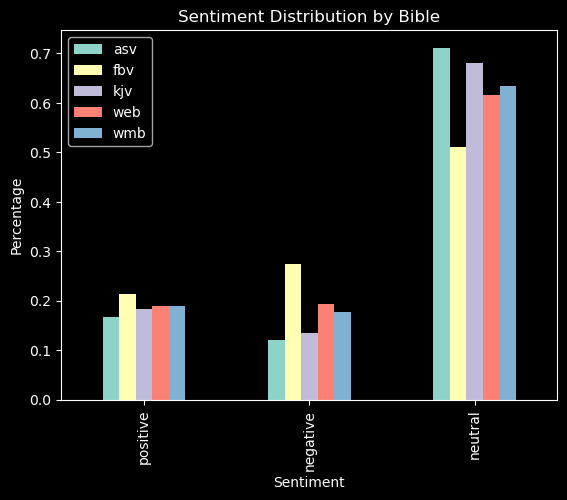

In [5]:
# Graph the sentiment distribution for each bible
bible_sentiments_df = pd.DataFrame(bible_sentiments)
bible_sentiments_df.plot(kind="bar")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.title("Sentiment Distribution by Bible")
plt.show()

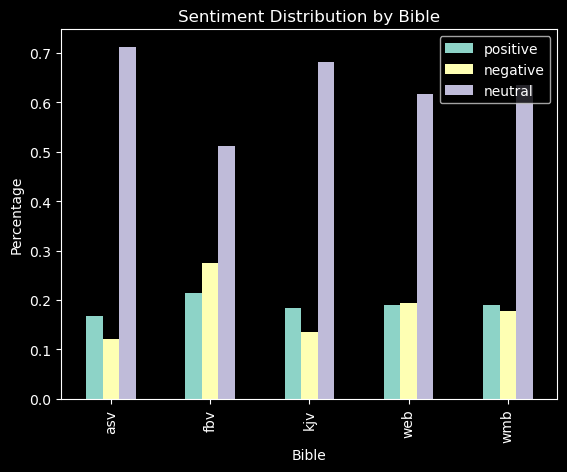

In [12]:
# Graph the sentiment distribution for each bible but make the x-axis each Bible
bible_sentiments_df.T.plot(kind="bar")
plt.xlabel("Bible")
plt.ylabel("Percentage")
plt.title("Sentiment Distribution by Bible")
plt.show()

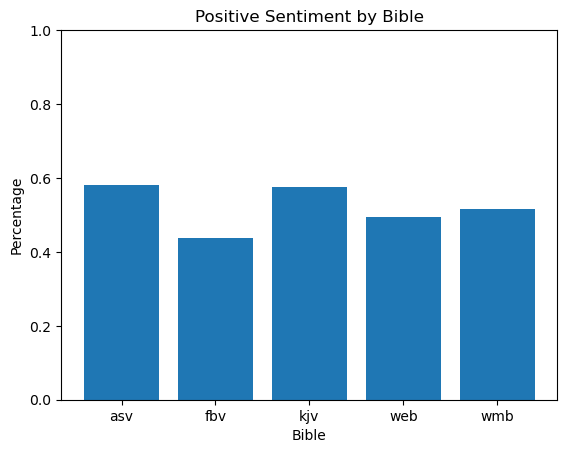

In [140]:
# Graph the total sentiment for each bible
plt.bar(bibles.keys(), total_sentiment.values())
plt.xlabel("Bible")
plt.ylabel("Percentage")
plt.title("Positive Sentiment by Bible")
plt.ylim(0, 1)
plt.show()

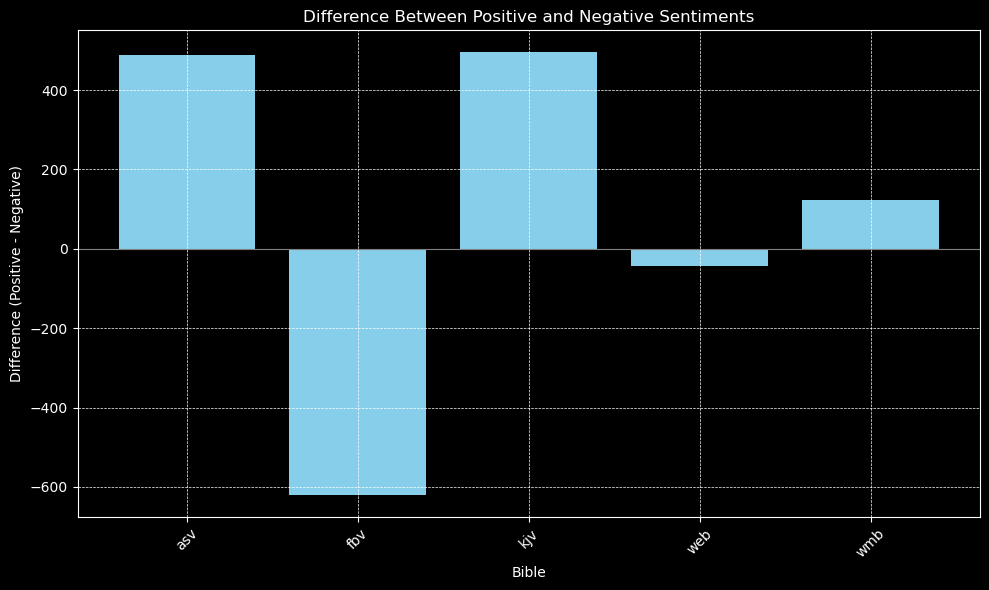

In [10]:
# difference in positive vs negative


def agg_values(df):
    positive = df[df["sentiment"] == 2].shape[0]
    negative = df[df["sentiment"] == 3].shape[0]
    neutral = df[df["sentiment"] == 1].shape[0]
    return {"Positive: ": positive, "Negative: ": negative, "Neutral: ": neutral}


results = {}
for bible in bibles:
    df = pd.read_csv(bibles[bible])
    results[bible] = agg_values(df)

diffs = {data: results[data]["Positive: "] - results[data]["Negative: "] for data in results}

# plot
plt.figure(figsize=(10, 6))
plt.bar(diffs.keys(), diffs.values(), color="skyblue")
plt.xlabel("Bible")
plt.ylabel("Difference (Positive - Negative)")
plt.title("Difference Between Positive and Negative Sentiments")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.axhline(0, color="gray", linewidth=0.8)

plt.tight_layout()
plt.show()